In [25]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: # To be able to import files 
    sys.path.append(module_path) # without installing the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bayesrul.utils.plotting import PredLogger, plot_rul_pred, findNewRul
from bayesrul.ncmapss.dataset import NCMAPSSDataModule
from bayesrul.ncmapss.frequentist import NCMAPSSModel, get_checkpoint
from bayesrul.ncmapss.bayesian import NCMAPSS_VIBnn


# Frequentist Model

In [2]:
path = '../results/ncmapss/frequentist/'
model_name = 'inception'

In [3]:
logger = PredLogger(path+model_name)
outputs = logger.load()

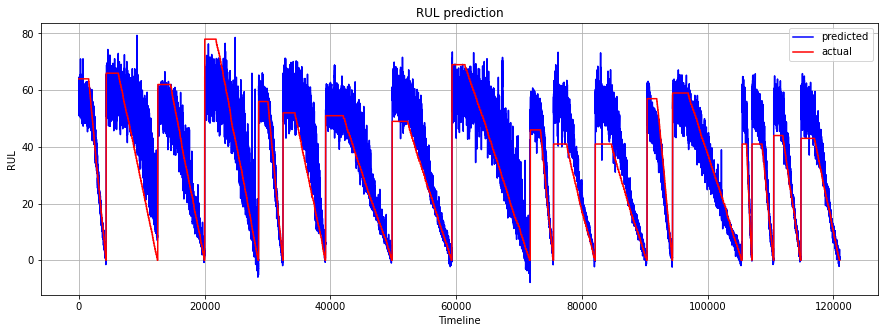

In [4]:
fig, ax = plot_rul_pred(outputs)

In [ ]:
import torch
checkpoint_file = get_checkpoint(path+model_name, version=None)
dnn = NCMAPSSModel.load_from_checkpoint(checkpoint_file)
torch.tensor(dnn.parameters())

(1010531,)
(614,)


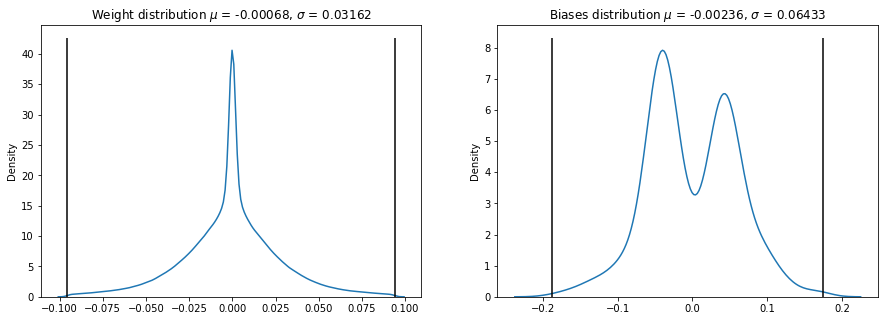

In [33]:
def plot_param_distribution(dnn):
    w = np.array([])
    b = np.array([])
    for layer in dnn.modules():
        try:
            w = np.append(w, layer.state_dict()['weight'])
            b = np.append(b, layer.state_dict()['bias'])
        except KeyError as e:
            pass

    s = 3
    w_mu, w_sigma = w.mean(), w.std()
    b_mu, b_sigma = b.mean(), b.std()
    w = w[w <= w_mu + s*w_sigma]; w = w[w >= w_mu - s*w_sigma]
    b = b[b <= b_mu + s*b_sigma]; b = b[b >= b_mu - s*b_sigma]

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.kdeplot(w, ax=axes[0])
    ymin, ymax = axes[0].get_ylim()
    axes[0].vlines(w.min(), ymin, ymax, colors='black')
    axes[0].vlines(w.max(), ymin, ymax, colors='black')
    sns.kdeplot(b, ax=axes[1])
    axes[0].title.set_text(f"Weights distribution $\mu$ = {round(w_mu, 5)}, $\sigma$ = {round(w_sigma, 5)}")
    ymin, ymax = axes[1].get_ylim()
    axes[1].vlines(b.min(), ymin, ymax, colors='black')
    axes[1].vlines(b.max(), ymin, ymax, colors='black')
    axes[1].title.set_text(f"Biases distribution $\mu$ = {round(b_mu, 5)}, $\sigma$ = {round(b_sigma, 5)}")
    

plot_param_distribution(dnn)

# Bayesian Model

In [26]:
from types import SimpleNamespace
from pathlib import Path

args = SimpleNamespace(
    data_path="../data/ncmapss/",
    out_path="../results/ncmapss/",
    model_name="testception",
    net="inception",
    lr=1e-4
)
"""
base_log_dir = Path(args.out_path, "bayesian", args.model_name)
checkpoint_file = get_checkpoint(base_log_dir, version=None)


data = NCMAPSSDataModule(args.data_path, batch_size=1000)
#dnn = NCMAPSSModel.load_from_checkpoint(checkpoint_file)"""

'\nbase_log_dir = Path(args.out_path, "bayesian", args.model_name)\ncheckpoint_file = get_checkpoint(base_log_dir, version=None)\n\n\ndata = NCMAPSSDataModule(args.data_path, batch_size=1000)\n#dnn = NCMAPSSModel.load_from_checkpoint(checkpoint_file)'

In [27]:
path = '../results/ncmapss/bayesian/'
model_name = 'alleluia_1'

logger = PredLogger(path+model_name, filename = "preds.npy")
outputs = logger.load()

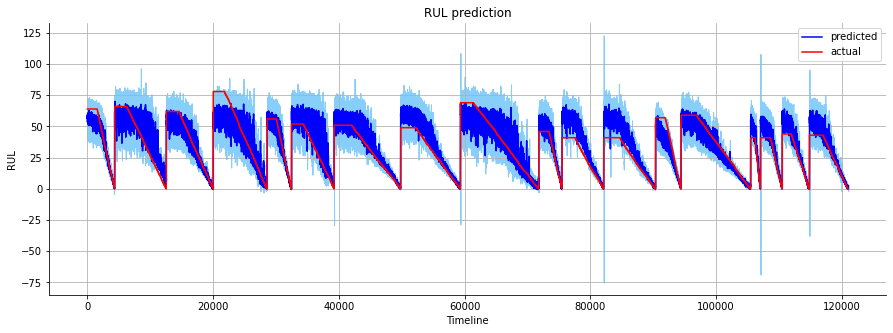

In [92]:
def plot_rul_pred(out, std=False):
    preds = out['preds']
    labels = out['labels']
    if std:
        stds = out['stds']

    n = len(preds)
    assert n == len(labels), "Inconsistent sizes predictions {}, labels {}"\
        .format(n, len(labels))

    fig, ax = plt.subplots(figsize = (15, 5))
    ax.plot(range(n), preds, color='blue', label='predicted')
    ax.plot(range(n), labels, color='red', label='actual')
    if std:
        ax.fill_between(range(n), preds-stds, preds+stds,
        color = 'lightskyblue')
    ax.set_title("RUL prediction")
    ax.set_xlabel("Timeline")
    ax.set_ylabel("RUL")

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    plt.grid()
    plt.legend()

    return fig, ax


fig, ax = plot_rul_pred(outputs, std=True)

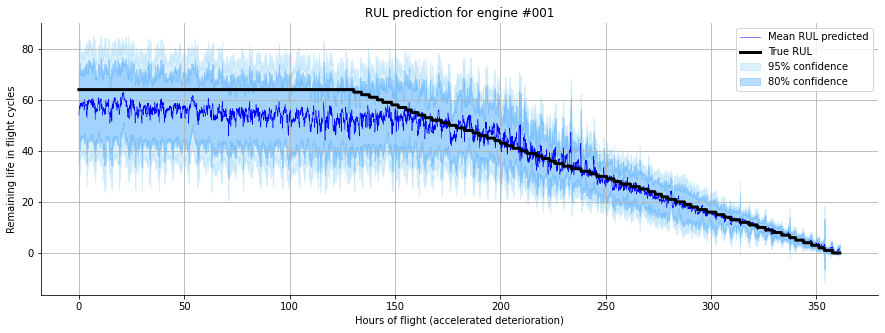

In [93]:
from bayesrul.utils.plotting import plot_one_rul_pred

fig, ax = plot_one_rul_pred(outputs, 1, std=True)